In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
plt.style.use('fivethirtyeight')

In [14]:
tsla_data_reader = pdr.data.YahooDailyReader('tsla', '2/1/2016','12/29/2017')

In [16]:
df = tsla_data_reader.read()
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-01,39.903999,36.549999,37.751999,39.388000,26488000,39.388000
2016-02-02,38.624001,36.046001,38.484001,36.556000,28868000,36.556000
2016-02-03,36.787998,34.035999,36.717999,34.695999,39657000,34.695999
2016-02-04,35.195999,33.397999,34.139999,35.066002,21927000,35.066002
2016-02-05,34.599998,31.548000,34.259998,32.520000,47188000,32.520000
...,...,...,...,...,...,...
2017-12-22,66.183998,64.963997,65.902000,65.040001,21079000,65.040001
2017-12-26,64.788002,63.316002,64.765999,63.458000,21892000,63.458000
2017-12-27,63.535999,62.150002,63.200001,62.327999,23560500,62.327999


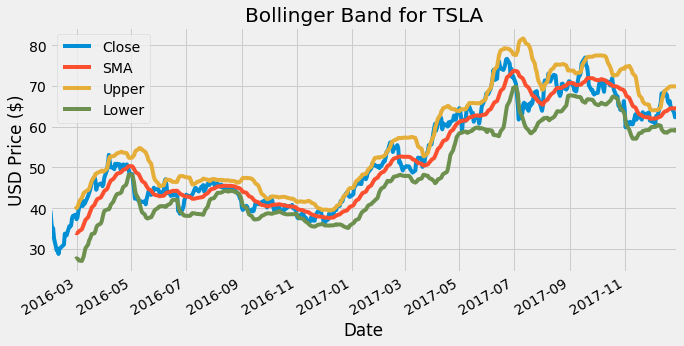

In [19]:
period = 20
# calculate SMA, standard deviation, upper band, and lower band
df['SMA'] = df['Close'].rolling(window=period).mean()
df['STD'] = df['Close'].rolling(window=period).std()
df['Upper'] = df['SMA'] + df['STD'] * 2
df['Lower'] = df['SMA'] - df['STD'] * 2

column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(10,5))
plt.title('Bollinger Band for TSLA')
plt.ylabel('USD Price ($)')
plt.show()

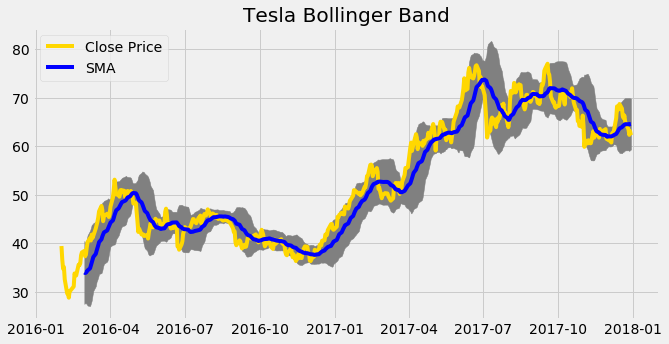

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
x_axis = df.index
ax.plot(x_axis, df['Close'], color='gold', label='Close Price')
ax.plot(x_axis, df['SMA'], color='blue', label='SMA')
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
ax.title.set_text('Tesla Bollinger Band')
ax.legend()

In [23]:
new_df = df[period-1:]
new_df

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2016-02-29,39.270000,37.844002,38.480000,38.386002,22495000,38.386002,33.934000,3.247349,40.428698,27.439302
2016-03-01,39.189999,36.540001,38.849998,37.270000,33561000,37.270000,33.828100,3.090893,40.009885,27.646315
2016-03-02,37.703999,36.299999,36.745998,37.667999,24312000,37.667999,33.883700,3.151944,40.187589,27.579812
2016-03-03,39.484001,36.844002,37.655998,39.147999,24145000,39.147999,34.106300,3.362504,40.831309,27.381292
2016-03-04,40.806000,39.500000,39.599998,40.208000,32445500,40.208000,34.363400,3.626002,41.615405,27.111395
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,66.183998,64.963997,65.902000,65.040001,21079000,65.040001,64.519300,2.694883,69.909067,59.129534
2017-12-26,64.788002,63.316002,64.765999,63.458000,21892000,63.458000,64.524100,2.692798,69.909696,59.138504
2017-12-27,63.535999,62.150002,63.200001,62.327999,23560500,62.327999,64.465001,2.728955,69.922910,59.007092


In [32]:
def get_signal(data):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]:
            sell_signal.append(np.nan)
            buy_signal.append(data['Close'][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return buy_signal, sell_signal

In [33]:
new_df['Buy'], new_df['Sell'] = get_signal(new_df)
new_df

/Users/shanetong/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2016-02-29,39.270000,37.844002,38.480000,38.386002,22495000,38.386002,33.934000,3.247349,40.428698,27.439302,NaN,NaN
2016-03-01,39.189999,36.540001,38.849998,37.270000,33561000,37.270000,33.828100,3.090893,40.009885,27.646315,NaN,NaN
2016-03-02,37.703999,36.299999,36.745998,37.667999,24312000,37.667999,33.883700,3.151944,40.187589,27.579812,NaN,NaN
2016-03-03,39.484001,36.844002,37.655998,39.147999,24145000,39.147999,34.106300,3.362504,40.831309,27.381292,NaN,NaN
2016-03-04,40.806000,39.500000,39.599998,40.208000,32445500,40.208000,34.363400,3.626002,41.615405,27.111395,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,66.183998,64.963997,65.902000,65.040001,21079000,65.040001,64.519300,2.694883,69.909067,59.129534,NaN,NaN
2017-12-26,64.788002,63.316002,64.765999,63.458000,21892000,63.458000,64.524100,2.692798,69.909696,59.138504,NaN,NaN
2017-12-27,63.535999,62.150002,63.200001,62.327999,23560500,62.327999,64.465001,2.728955,69.922910,59.007092,NaN,NaN


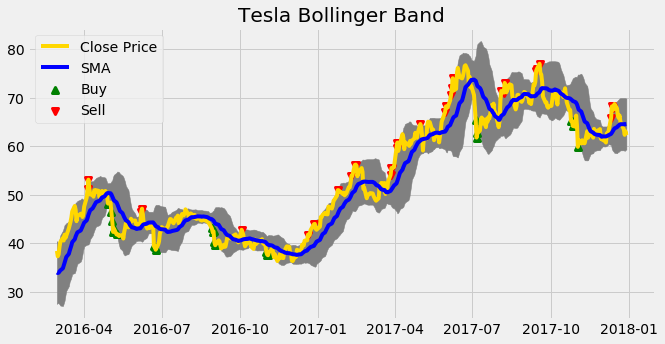

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
x_axis = new_df.index
ax.plot(x_axis, new_df['Close'], color='gold', label='Close Price')
ax.plot(x_axis, new_df['SMA'], color='blue', label='SMA')
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
ax.scatter(x_axis, new_df['Buy'], color='green', lw=3, label='Buy', marker='^')
ax.scatter(x_axis, new_df['Sell'], color='red', lw=3, label='Sell', marker='v')
ax.title.set_text('Tesla Bollinger Band')
ax.legend()